In [4]:
#Importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
import seaborn as sns

#models for encoding
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

#for classificaion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#for both regression and classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing other modules and libraries
from matplotlib.patches import Polygon
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from statistics import mean, stdev


In [5]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [6]:
# Now I compare the frequency of the different qualities of red wines for the presentation 
r_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-red.csv", sep=";")


# following common data science pratice and changing the coloumn nacmes

r_wine.columns = r_wine.columns.str.replace(' ', '_')
r_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [7]:
#Now we will split the dataset into two: one with 3 quality labels and the other with 4 quality labels

# This dataset will be transformed to include 3 quality labels
rw_3ql = r_wine.copy()

# This dataset will be transformed to include 4 quality labels
rw_4ql = r_wine.copy()

display(rw_3ql.head(5), rw_4ql.head(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,medium


'Quality distribution - 3labels'

,quality_label
low,744
medium,837
high,18


'Quality distribution 4 labels'

,quality_label
low,744
medium,638
high,199
premium,18


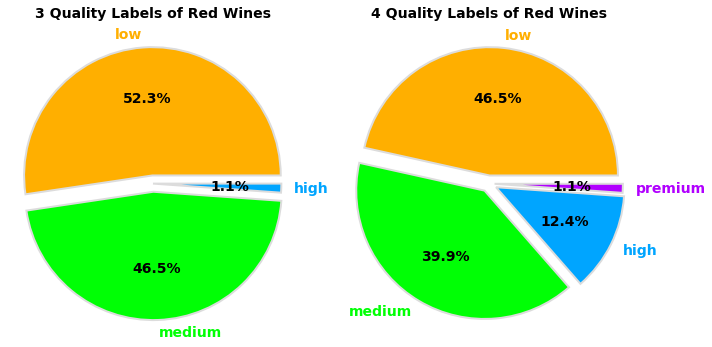

In [9]:

# Now I create a new column called "quality_label", define 3 ranges and associate each range with a label for the red wines
rw_3ql["quality_label"] = rw_3ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
rw_3ql["quality_label"] = pd.Categorical(rw_3ql["quality_label"], 
categories = ["low", "medium", "high"])

display(rw_3ql.head(5), rw_3ql.tail(5))


# Now I create a new column called "quality_label", define 4 ranges and associate each range with a label for red wines
rw_4ql["quality_label"] = rw_4ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value == 6 else "high" if value == 7 else "premium")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
rw_4ql["quality_label"] = pd.Categorical(rw_4ql["quality_label"], 
categories = ["low", "medium", "high", "premium"])

#lets check our new dataset 
display(rw_4ql.head(5), rw_4ql.tail(5))


# Now I compare the frequency of the different qualities of wines in the different datasets
display("Quality distribution - 3labels", pd.DataFrame(rw_3ql["quality_label"].value_counts()).sort_index())

# let's check how many premium wines we actually have in the dataset
display("Quality distribution 4 labels", pd.DataFrame(rw_4ql["quality_label"].value_counts()).sort_index())

# based on the results below a grouping of the different qualities with 4 labels allows us to split the samples in a more evenly distributed way.

#plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10,10))
colors = plt.get_cmap("gist_rainbow")(np.linspace(0.16, 0.895, len(rw_4ql["quality_label"].value_counts())))
labels_3 = rw_3ql["quality_label"].cat.categories
labels_4 = rw_4ql["quality_label"].cat.categories


patches, texts, pcts = axs[0].pie(rw_3ql["quality_label"].value_counts(),
                        labels= labels_3,
                        colors=colors, 
                        explode= (0.07, 0.07, 0.0), 
                        autopct='%1.1f%%', 
                        radius=1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

patches, texts, pcts = axs[1].pie(rw_4ql["quality_label"].value_counts(), 
                        labels= labels_4, 
                        colors=colors, 
                        explode= (0.07, 0.07, 0.07, 0.05), 
                        autopct='%1.1f%%', 
                        radius= 1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

axs[0].set_title("3 Quality Labels of Red Wines",{"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)
axs[1].set_title("4 Quality Labels of Red Wines", {"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)

plt.tight_layout()